# Q.1) Prepare a model for glass classification using KNN

### Libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

### Dataset

In [2]:
glass=pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [4]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### Splitting data into X and Y(independent and dependent)

In [5]:
array=glass.values
X=array[:,0:9]
Y=array[:, 9]

### KNN

In [6]:
num_folds=10
kfold=KFold(n_splits=10)

In [7]:
model=KNeighborsClassifier(n_neighbors=5)
results=cross_val_score(model,X,Y,cv=kfold)

In [8]:
print(results.mean())

0.524891774891775


### Grid Search for Algorithim Tuning 

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
n_neighbors=np.array(range(1,51))
param_grid=dict(n_neighbors=n_neighbors)

In [11]:
model1=KNeighborsClassifier()
grid=GridSearchCV(estimator=model1,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [12]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


### visualizing the CV results

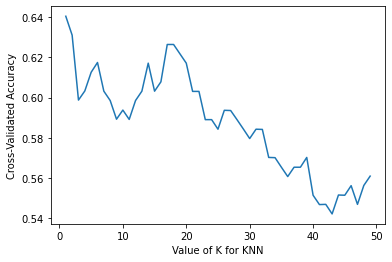

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 51
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Q.2) Implement a KNN model to classify the animals in to categorie

### Dataset

In [14]:
zoo=pd.read_csv("zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [15]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [16]:
zoo.shape

(101, 18)

In [17]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [18]:
# Rename the column 
zoo=zoo.rename({'animal name': 'animal_name'},axis=1)
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [19]:
#check if there are duplicates in animal_name
duplicates =zoo.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [20]:
#select these duplicates frog
frog = zoo.loc[zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [21]:
# observation: find that one frog is venomous and another one is not 
#              change the venomous one into frog2 to seperate 2 kinds of frog 
zoo['animal_name'][(zoo.venomous == 1 )& (zoo.animal_name == 'frog')] = "frog2"

C:\Users\shash\AppData\Local\Temp\ipykernel_1604\1270754725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoo['animal_name'][(zoo.venomous == 1 )& (zoo.animal_name == 'frog')] = "frog2"


In [22]:
#label_encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
zoo['animal_name']=label_encoder.fit_transform(zoo['animal_name'])
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


### Splitting data into X and Y(independent and dependent) 

In [23]:
array_1=zoo.values
x=array_1[:,0:17]
y=array_1[:, 17]

In [24]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

### KNN

In [25]:
num_folds=10
kfold=KFold(n_splits=10)

In [26]:
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [27]:
import warnings
warnings.filterwarnings("ignore")
model_1=KNeighborsClassifier(n_neighbors=5)
results_1=cross_val_score(model_1,x,y,cv=kfold)

In [28]:
print(results_1.mean())

0.25000000000000006


### Grid Search for Algorithim Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
n_neighbors1=np.array(range(1,51))
param_grid1=dict(n_neighbors=n_neighbors1)

In [31]:
model_2=KNeighborsClassifier()
grid1=GridSearchCV(estimator=model_2,param_grid=param_grid1)
grid1.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [32]:
print(grid1.best_score_)
print(grid1.best_params_)

0.4057142857142857
{'n_neighbors': 19}


### visualizing the cv results 

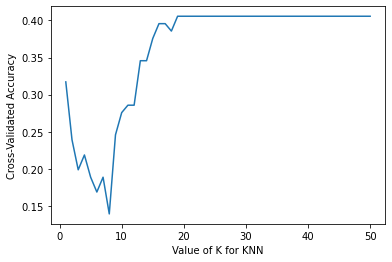

In [33]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 51
k_range1 = range(1, 51)
k_scores1 = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range1:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    scores1 = cross_val_score(knn1, x, y, cv=5)
    k_scores1.append(scores1.mean())
# plot to see clearly
plt.plot(k_range1, k_scores1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()